# T Test Exercises

In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from pydataset import data
import statistics

alpha = 0.05

## 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
## A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
## A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
- average time (numeric continuous values) to sell for two different groups (categories)
- One sample or two sample? 
- One tailed or two tailed?

Form a hypothesis:

$H_0$ = Average time to sell at office1 == average time to sell at office2  
$H_a$ = Average time to sell at office1 != average time to sell at office2

Significance level $\alpha$ = 0.05

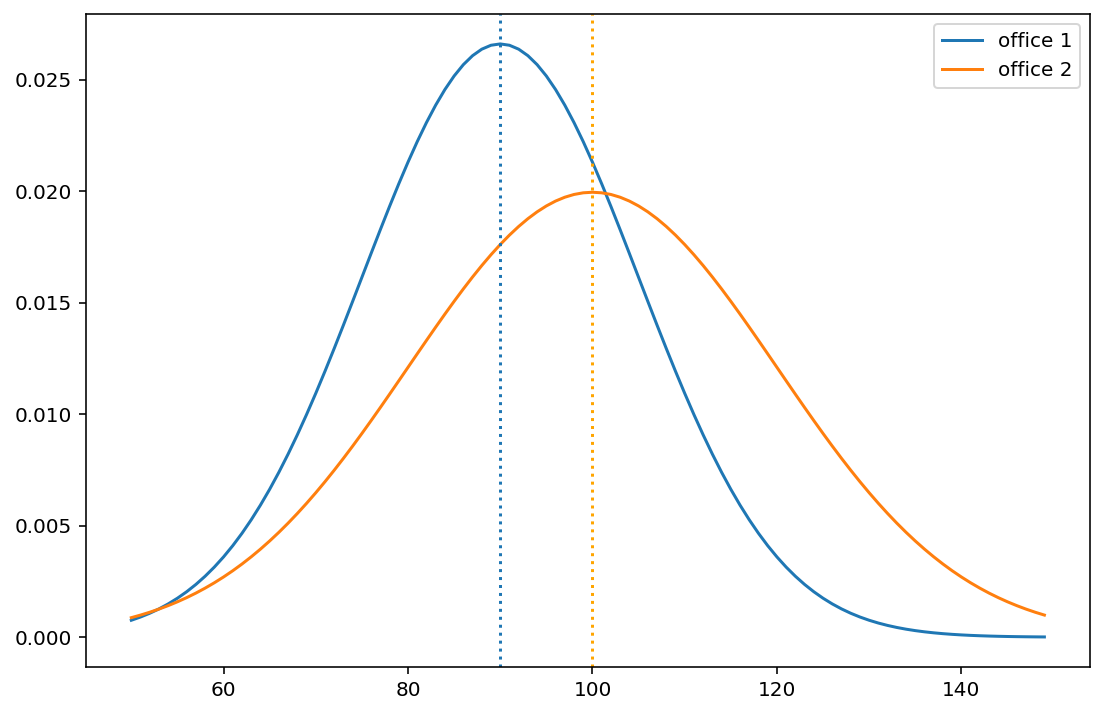

In [2]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [3]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [4]:
print(office_1.var())
print(office_2.var())

240.678641870083
312.7848192729912


In [5]:
stat, p_val = stats.levene(office_1, office_2)

if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

In [6]:
#Using Scipy 
α = 0.05

t_stat, p_val = stats.ttest_ind(office_1, office_2, equal_var=False)
print(f't-stat: {t_stat}')
print(f'p-value: {p_val}')

t-stat: -5.145469431085633
p-value: 1.6279214801401246e-06


In [7]:
print(f'''
Because the p-value ({p_val}) is less than alpha value ({α}), we reject the null hypothesis''')


Because the p-value (1.6279214801401246e-06) is less than alpha value (0.05), we reject the null hypothesis


### But we used random values?

We note that simulating the random values from the distributive stats are not providing us with the level of detail that we may want out of a problem like this. In order to get the most ideal results possible, we will conduct a slightly different variation of the test using ttest_ind_from_stats, which is more alligned with the information that has been posited to us in this specific scenario.

T-test using descriptive stats: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html

In [8]:
t_stat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

In [9]:
if pval < α:
    print('Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.')

Our p-value is less than alpha and we can reject the null hypothesis, indicating some difference in the sales time between the offices.


## 2. Load the mpg dataset and use it to answer the following questions:

In [10]:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


### 1.  Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

* One tail/ Two tailed? Two tailed: looking specifically for inequality
* One sample/ Two sample? Two sample (independent) Looking to compare values across cars manufactured specifically in 2008 versus cars specifically in 1999
* For this one, we will perform a ttest_ind on these two subsets of our data

$H_0$: there is no difference in fuel-efficiency in cars from 2008 vs 1999  
$H_a$: there is a difference in fuel-efficiency in cars from 2008 vs 1999

Calculate average fuel economy assuming 50% highway and 50% city driving


- Should I use arithmetic mean or harmonic mean for average mpg?
    - Arithmetic Mean: fe_am = (cty + hwy)/2
    - Harmonic Mean: fe_hm = 2/(1/cty + 1/hwy)

In [11]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [12]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

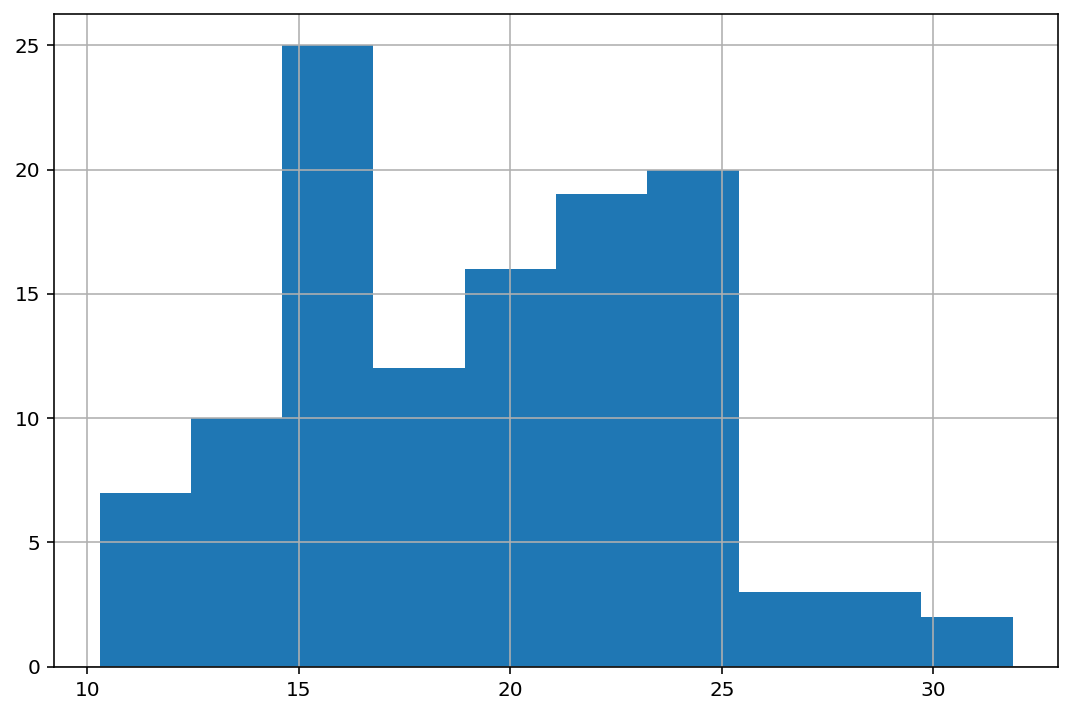

In [13]:
# plot distribution for fe_2008
plt.figure(figsize=(9,6))
fe_2008.hist()

<AxesSubplot:>

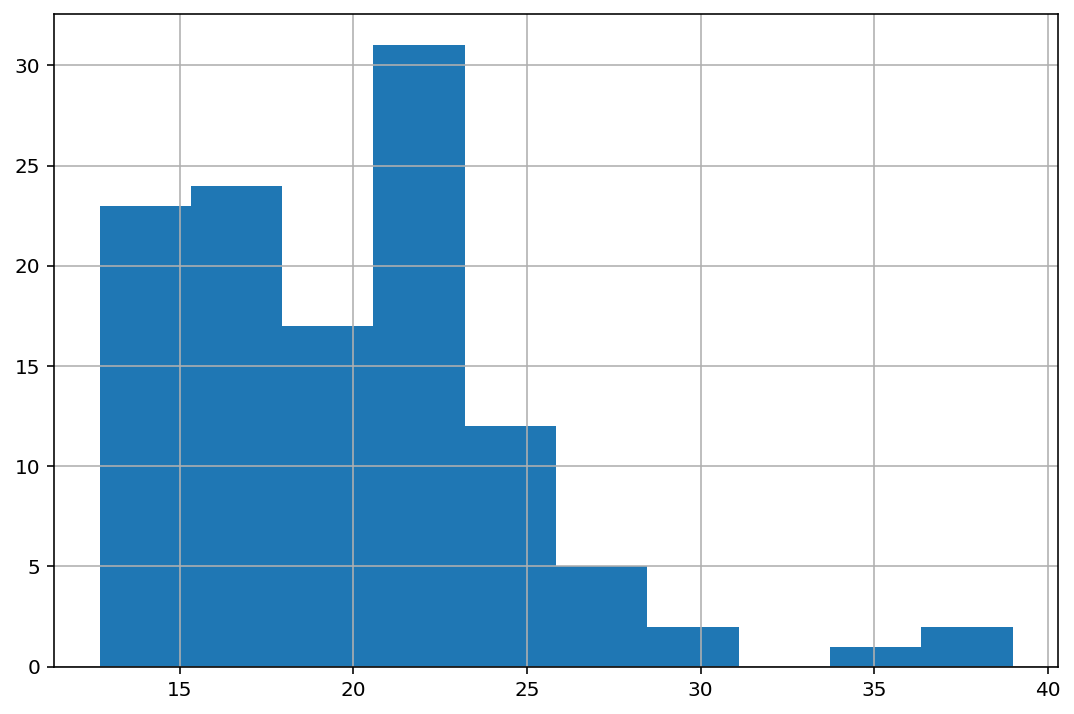

In [14]:
# plot distribution for fe_2008
plt.figure(figsize=(9,6))
fe_1999.hist()

In [15]:
# how many observations I have for each sample? (N>30,we we meet normality condition)

fe_2008.count(), fe_1999.count()

(117, 117)

In [16]:
# is the variance same for both sample? Yes

fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [17]:
# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_2008, fe_1999)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [18]:
# calculate t-statistic and p value

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [19]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.


In [20]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

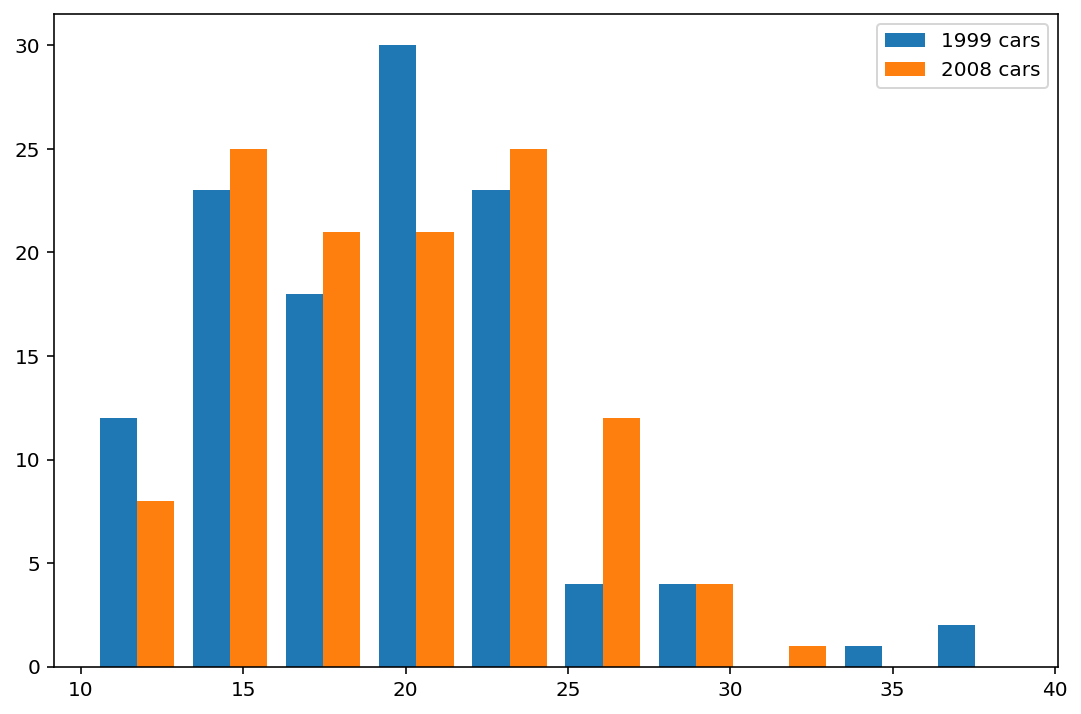

In [21]:
plt.figure(figsize=(9,6))
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### 2. Are compact cars more fuel-efficient than the average car?


* One tailed or two tailed? One-tailed: we want to say that compact cars average mileage > all cars average mileage
* One sample or two sample? One sample. We care comparing compacts to overall cars

$H_0$: MPG for compact cars <= mpg for the average car   
$H_a$: MPG for Compact cars are > mpg than the average car

* p/2 will be compared to alpha as opposed to just p (because of the one tail)
* t stat should be positive if we feed compact car value into our function first

So to reject the null hypothesis, I need $t > 0$ and  $p/2 < 0.05$

In [22]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

<AxesSubplot:>

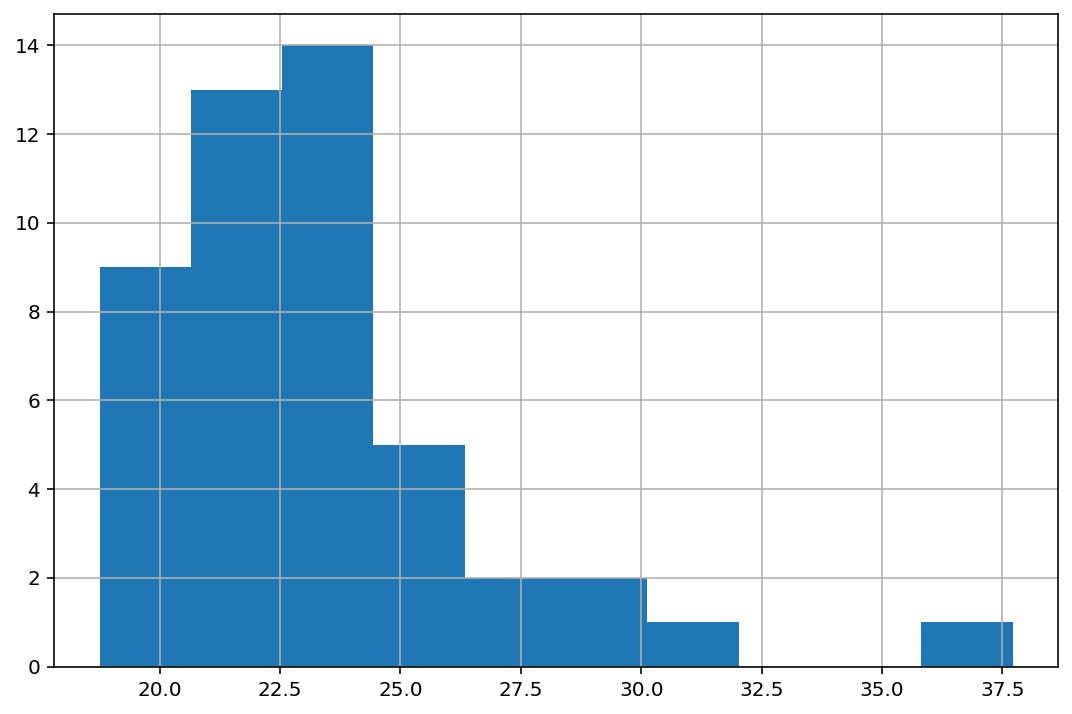

In [23]:
# look at distribution of fuel economy of compact cars. It also shows > 30 observations
# so we meet normality assunption for t-test

plt.figure(figsize=(9,6))
fe_compact.hist()

In [24]:
# calculate t and p values:

t, p = stats.ttest_1samp(fe_compact, μ)
t, p/2, alpha

(7.512360093161354, 7.808833174403837e-10, 0.05)

In [25]:
print(f'''Because p/2 ({p/2:.11f}) < alpha (.05) and t > 0, we reject the null hypothesis.''')

Because p/2 (0.00000000078) < alpha (.05) and t > 0, we reject the null hypothesis.


#### Do manual cars get better gas mileage than automatic cars?

* One tailed or two tailed? One-tailed, manual cars getting better gas mileage than automatic cars
* One sample or two sample? Two sampled, manual cars and automatic cars are discrete categories

$H_0$: mean mpg for manual cars <= mean mpg for automatic cars  
$H_a$: mean mpg for manual cars > mean mpg for automatic cars

Again, One sample test: $p/2 > \alpha$ and $t > 0$

In [26]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [27]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

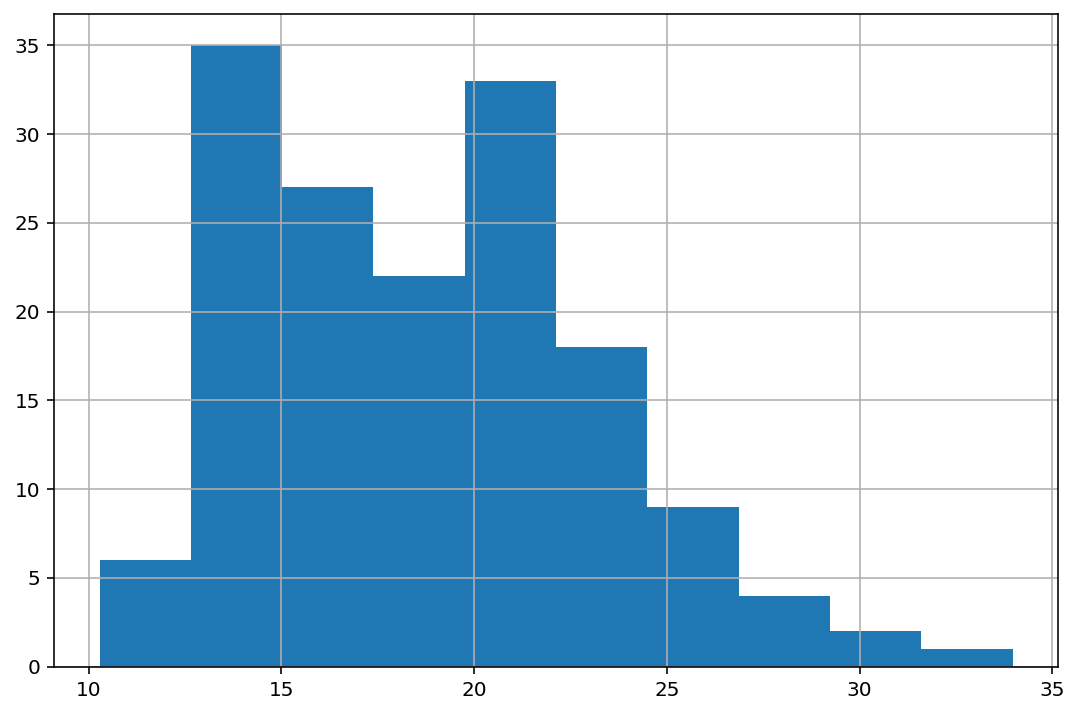

In [28]:
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_auto.hist()

<AxesSubplot:>

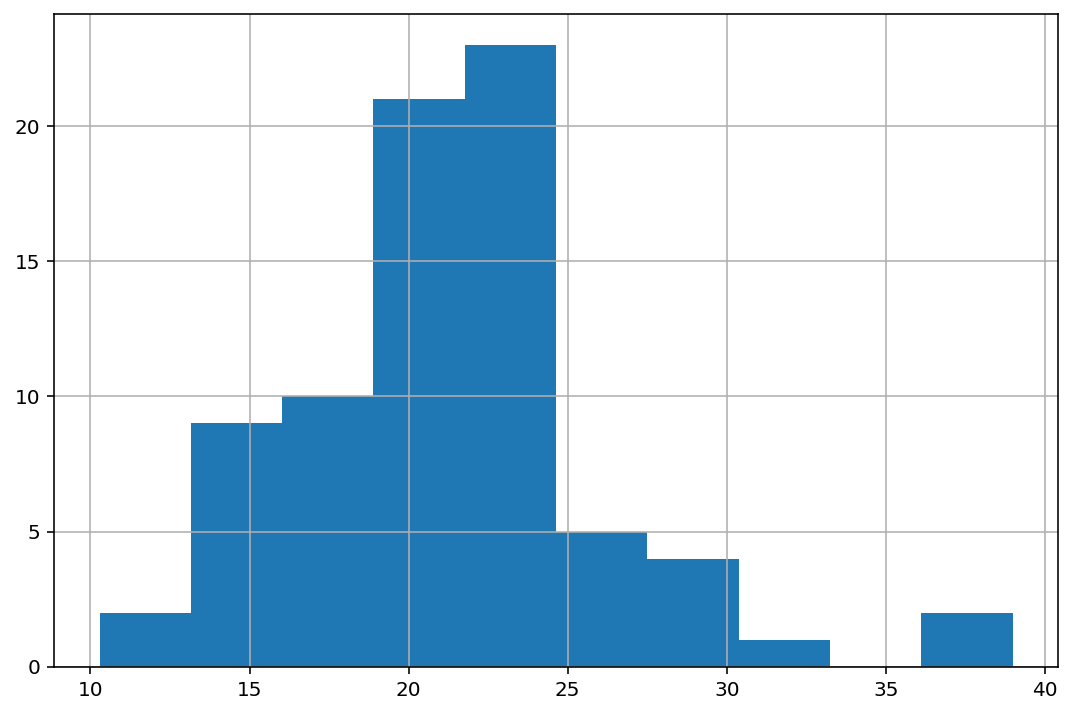

In [29]:
# look at the distribution. N >30

plt.figure(figsize=(9,6))
fe_manual.hist()

In [30]:
# look at variances
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [31]:
# # # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [32]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var = True)
t, p/2, alpha

(4.652577547151351, 2.7552323050220043e-06, 0.05)

In [33]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), and t > 0, we reject the null hypothesis''')


Because p/2 (0.000003) < alpha (.05), and t > 0, we reject the null hypothesis


In [34]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

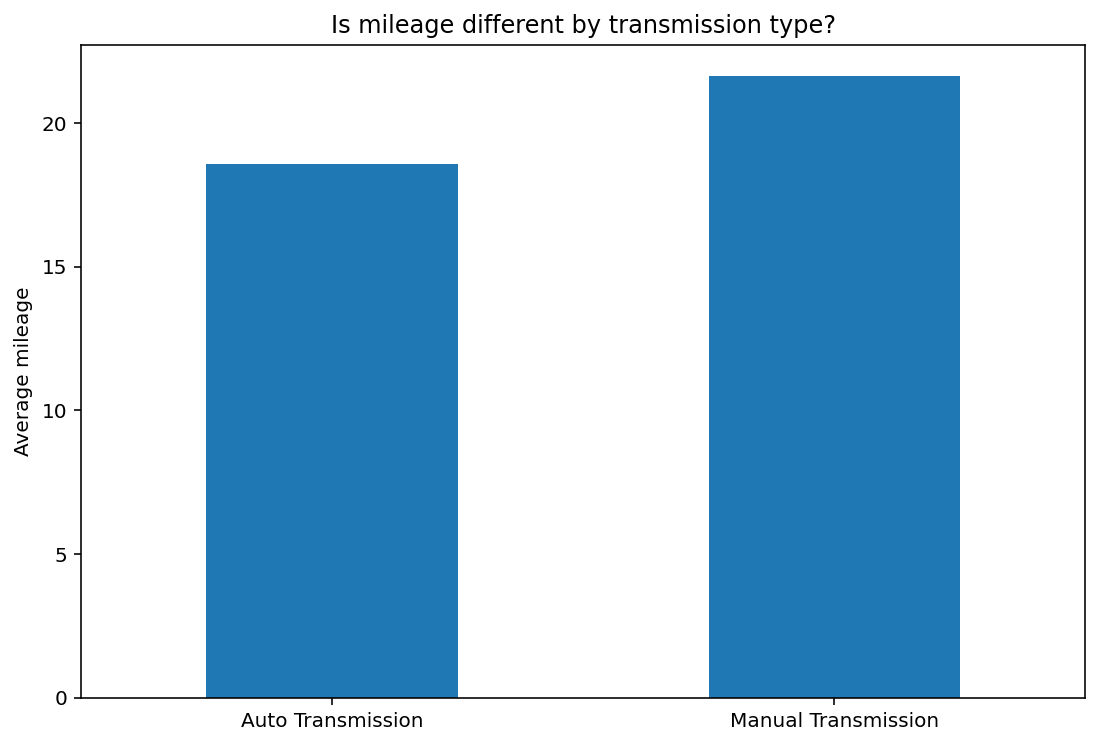

In [35]:
plt.figure(figsize=(9,6))
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')